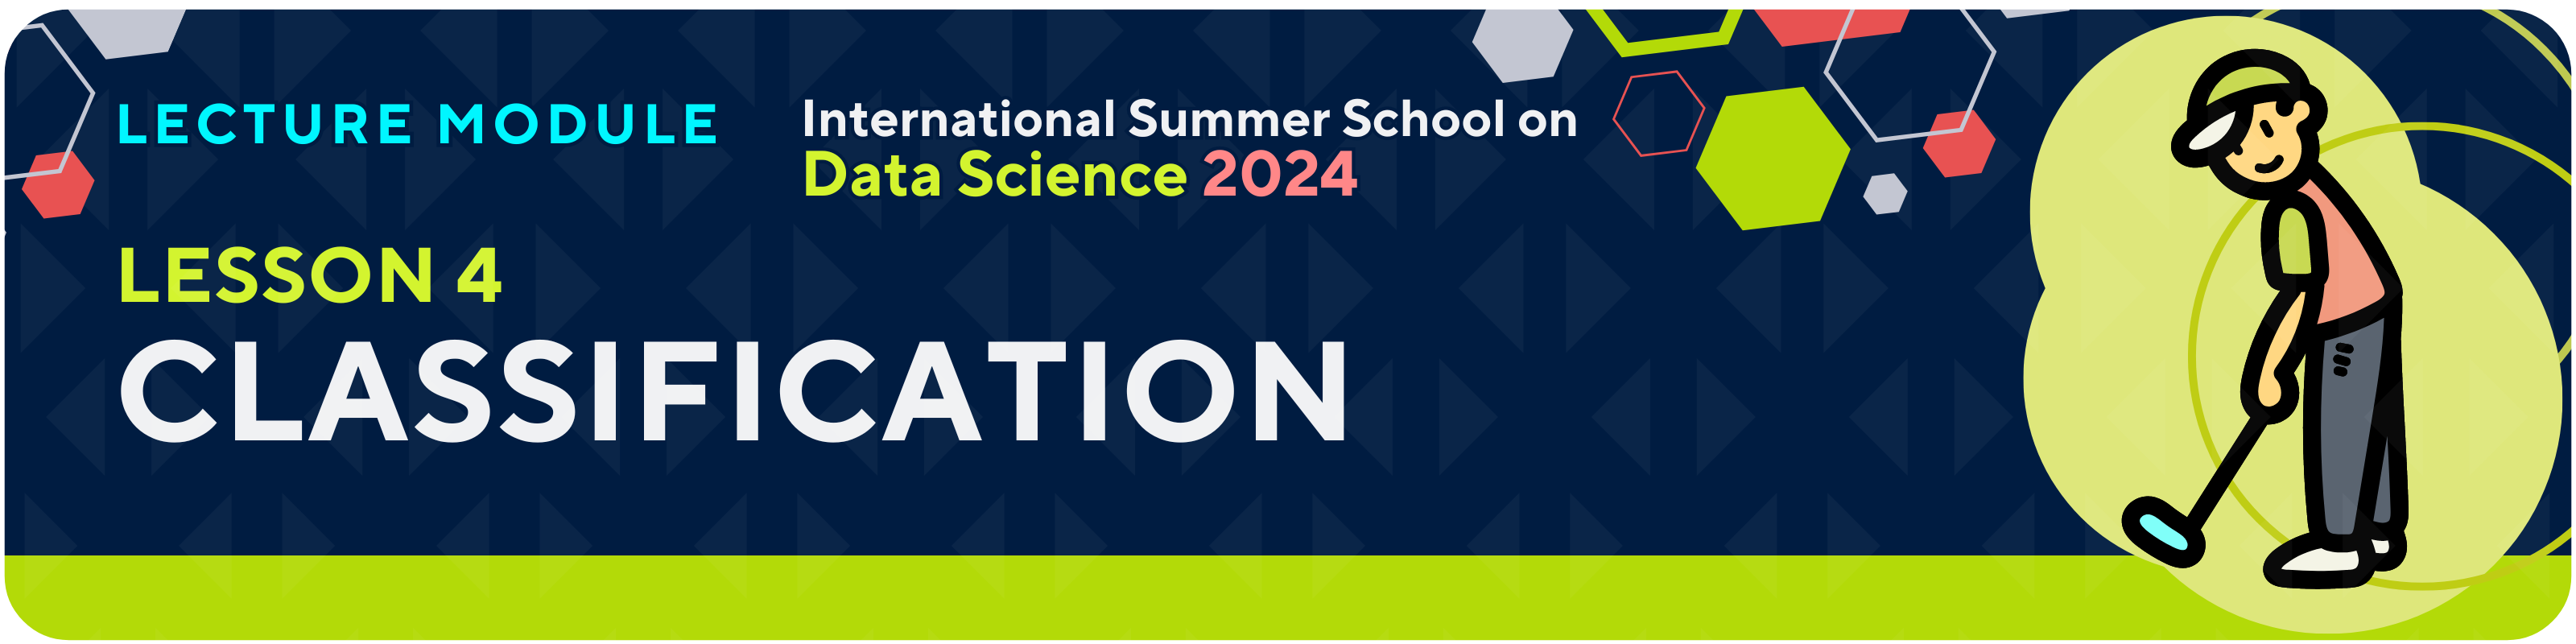

<div class='markdown-google-sans'>

## **04.0**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Intro To Classification**
</div>

<img src="https://i.imgur.com/Tuf1CYe.png" width=700 />

<img src="https://i.imgur.com/Fp1ZHp9.png" width=700 />


<img src="https://i.imgur.com/soGeBnr.png" width=700 />


---
---

<div class='markdown-google-sans'>

## **04.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dummy Classifier**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Dummy Classifier**
</div>
<img src="https://i.imgur.com/4uXXvsL.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/XUgPkMo.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# ONE-HOT ENCODE 'Outlook' COLUMN
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)

# CONVERT 'Windy' (bool) and 'Play' (binary) COLUMNS TO BINARY INDICATORS
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature  Humidity  Wind  overcast  rain  sunny  Play
0          85.0      85.0     0         0     0      1     0
1          80.0      90.0     1         0     0      1     0
2          83.0      78.0     0         1     0      0     1
3          70.0      96.0     0         0     1      0     1
4          68.0      80.0     0         0     1      0     1
5          65.0      70.0     1         0     1      0     0
6          64.0      65.0     1         1     0      0     1
7          72.0      95.0     0         0     0      1     0
8          69.0      70.0     0         0     0      1     1
9          75.0      80.0     0         0     1      0     1
10         75.0      70.0     1         0     0      1     1
11         72.0      90.0     1         1     0      0     1
12         81.0      75.0     0         1     0      0     1
13         71.0      80.0     1         0     1      0     0

    Temperature  Humidity  Wind  overcast  rain  sunny  Play
14         81.0      88

In [ ]:
print(pd.read_csv(dataset_url))

     Outlook  Temperature  Humidity   Wind Play
0      sunny         85.0      85.0  False   No
1      sunny         80.0      90.0   True   No
2   overcast         83.0      78.0  False  Yes
3       rain         70.0      96.0  False  Yes
4       rain         68.0      80.0  False  Yes
5       rain         65.0      70.0   True   No
6   overcast         64.0      65.0   True  Yes
7      sunny         72.0      95.0  False   No
8      sunny         69.0      70.0  False  Yes
9       rain         75.0      80.0  False  Yes
10     sunny         75.0      70.0   True  Yes
11  overcast         72.0      90.0   True  Yes
12  overcast         81.0      75.0  False  Yes
13      rain         71.0      80.0   True   No
14     sunny         81.0      88.0   True   No
15  overcast         74.0      92.0  False  Yes
16      rain         76.0      85.0  False  Yes
17     sunny         78.0      75.0   True   No
18     sunny         82.0      92.0  False   No
19      rain         67.0      90.0   Tr

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>


<img src="https://i.imgur.com/lUtLz0O.png" width=700 />


In [ ]:
from sklearn.dummy import DummyClassifier

# Choose a strategy for your DummyClassifier (e.g., 'most_frequent', 'stratified', etc.)
strategy = 'most_frequent'

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/618F7AT.png" width=700 />


In [ ]:
# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy=strategy)

# "Train" the DummyClassifier (although no real training happens)
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/D6uIDj3.png" width=700 />


In [ ]:
# Use the DummyClassifier to make predictions
y_pred = dummy_clf.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

Label     : [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Prediction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/Ivqbnkd.png" width=700 />


In [ ]:
# Evaluate the DummyClassifier's accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Dummy Classifier Accuracy: {accuracy.round(4)*100}%")

Dummy Classifier Accuracy: 64.29%


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/rvnF8At.png" width=700 />


In [ ]:
print(f"Label      :{list(y_test)}\n")

strategies = ['stratified', 'most_frequent', 'uniform']
for strategy in strategies:
    dummy_clf = DummyClassifier(strategy=strategy, random_state=42)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    print(f"{strategy}:")
    print(f"Prediction : {list(y_pred)}")
    print(f"Accuracy   : {accuracy_score(y_test, y_pred).round(4)*100}%\n")

Label      :[0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]

stratified:
Prediction : [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Accuracy   : 35.709999999999994%

most_frequent:
Prediction : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy   : 64.29%

uniform:
Prediction : [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
Accuracy   : 42.86%



<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/3Sae34L.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Dummy Classifier Simplified**
</div>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Load dataset from URL
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Perform one-hot encoding on 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)

# Convert 'Wind' and 'Play' columns to binary indicators
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Split data into features (X) and target (y), then into training and test sets
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Initialize and train the dummy classifier model
dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Calculate and print the model's accuracy on the test data
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5714285714285714


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-1**
</div>

Using the following dataset, perform 'Dummy Classifier' using `strategy='uniform', random_state=42` on the column 'Play'. Print out the accuracy score.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

# # Perform one-hot encoding on 'Outlook' column
# df = pd.get_dummies(df, columns=['Yes'], prefix='', prefix_sep='', dtype=int)

# # Convert 'Wind' and 'Play' columns to binary indicators
# # df['Wind'] = df['Wind'].astype(int)
# df['Play'] = (df['Play'] == 1).astype(int)

# Split data into features (X) and target (y), then into training and test sets
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Initialize and train the dummy classifier model
dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Calculate and print the model's accuracy on the test data
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print(df.head())

Accuracy: 0.3333333333333333
   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Play  
0              0     1  
1              0   

In [ ]:
# Answer
df.head()


,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,Outlook_Overcast,Outlook_Rainy,Outlook_Snowy,Outlook_Sunny,Play
0,12.56,11.10,34.58,27.68,76.25,10,0,0,1,0,1
1,10.10,8.72,20.60,63.92,53.94,10,1,0,0,0,0
2,11.10,8.27,17.28,75.45,77.86,5,1,0,0,0,0
3,10.89,10.73,22.38,49.55,53.04,7,0,0,1,0,1
4,12.95,8.01,28.71,24.45,0.06,8,1,0,0,0,1


---
---

<div class='markdown-google-sans'>

## **04.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**kNN Classifier**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About k Nearest Neighbor**
</div>
<img src="https://i.imgur.com/o9IdFV8.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/SDLGSWJ.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Make the dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
original_df = pd.DataFrame(dataset_dict)

print(original_df)

     Outlook  Temperature  Humidity   Wind Play
0      sunny         85.0      85.0  False   No
1      sunny         80.0      90.0   True   No
2   overcast         83.0      78.0  False  Yes
3      rainy         70.0      96.0  False  Yes
4      rainy         68.0      80.0  False  Yes
5      rainy         65.0      70.0   True   No
6   overcast         64.0      65.0   True  Yes
7      sunny         72.0      95.0  False   No
8      sunny         69.0      70.0  False  Yes
9      rainy         75.0      80.0  False  Yes
10     sunny         75.0      70.0   True  Yes
11  overcast         72.0      90.0   True  Yes
12  overcast         81.0      75.0  False  Yes
13     rainy         71.0      80.0   True   No
14     sunny         81.0      88.0   True   No
15  overcast         74.0      92.0  False  Yes
16     rainy         76.0      85.0  False  Yes
17     sunny         78.0      75.0   True   No
18     sunny         82.0      92.0  False   No
19     rainy         67.0      90.0   Tr

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>

<img src="https://i.imgur.com/l2HKyP6.png" width=700 />


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocess data
df = pd.get_dummies(original_df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)
df = df[['sunny','rainy','overcast','Temperature','Humidity','Wind','Play']]

# Split data and standardize features
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Print results
print(pd.concat([X_train, y_train], axis=1).round(2), '\n')
print(pd.concat([X_test, y_test], axis=1).round(2), '\n')

    sunny  rainy  overcast  Temperature  Humidity  Wind  Play
0       1      0         0         1.80      0.50     0     0
1       1      0         0         1.02      1.02     1     0
2       0      0         1         1.49     -0.24     0     1
3       0      1         0        -0.56      1.66     0     1
4       0      1         0        -0.88     -0.03     0     1
5       0      1         0        -1.35     -1.08     1     0
6       0      0         1        -1.51     -1.61     1     1
7       1      0         0        -0.25      1.55     0     0
8       1      0         0        -0.72     -1.08     0     1
9       0      1         0         0.23     -0.03     0     1
10      1      0         0         0.23     -1.08     1     1
11      0      0         1        -0.25      1.02     1     1
12      0      0         1         1.17     -0.56     0     1
13      0      1         0        -0.41     -0.03     1     0 

    sunny  rainy  overcast  Temperature  Humidity  Wind  Play
14    

In [ ]:
for i in X_test['Humidity']:print(round(i,2))

0.81
1.24
0.5
-0.56
1.24
1.02
0.5
0.81
-1.61
-1.08
-2.14
1.55
-1.08
-0.24


<img src="https://i.imgur.com/aNzULp4.png" width=700 />

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Select the Number of Neighbors ('k')
k = 5

<img src="https://i.imgur.com/avPTNVj.png" width=700 />


In [ ]:
## Choose a Distance Metric
distance_metric = 'euclidean'

## Trying to calculate distance between ID 0 and ID 1
print(np.linalg.norm(X_train.loc[0].values - X_train.loc[1].values))

1.3789269844186147


<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/8azH4Fs.png" width=700 />

In [ ]:
# Initialize the k-NN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)

# "Train" the kNN (although no real training happens)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/evOaqpC.png" width=700 />


In [ ]:
from scipy.spatial import distance

# Compute the distances from the first row of X_test to all rows in X_train
distances = distance.cdist(X_test.iloc[0:1], X_train, metric='euclidean')

# Create a DataFrame to display the distances
distance_df = pd.DataFrame({
    'Train_ID': X_train.index,
    'Distance': distances[0].round(2),
    'Label': y_train
}).set_index('Train_ID')

print(distance_df.sort_values(by='Distance'))
for i in distance_df.sort_values(by='Distance').index:print(i)

          Distance  Label
Train_ID                 
1             0.26      0
0             1.22      0
7             1.89      0
11            2.02      1
2             2.05      1
10            2.12      1
9             2.15      1
12            2.21      1
13            2.28      0
3             2.59      1
4             2.82      1
8             2.86      1
5             3.46      0
6             3.88      1
1
0
7
11
2
10
9
12
13
3
4
8
5
6


<img src="https://i.imgur.com/rYORymN.png" width=700 />


In [ ]:
# Use the k-NN Classifier to make predictions
y_pred = knn_clf.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

Label     : [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Prediction: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/VEQowwH.png" width=700 />


In [ ]:
from sklearn.metrics import accuracy_score
# Evaluation Phase
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(4)*100}%')

Accuracy: 78.57%


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/MdgvunM.png" width=700 />


In [ ]:
labels, predictions, accuracies = list(y_test), [], []

k_list = [3, 5, 7]
for k in k_list:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'k = {k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'k = {k}' for k in k_list]).T

print(df_predictions)
print(df_accuracies)

    Label  k = 3  k = 5  k = 7
0       0      0      0      1
1       1      1      1      1
2       1      1      1      1
3       0      1      1      1
4       0      0      0      1
5       0      1      1      1
6       1      1      1      1
7       1      1      1      1
8       1      1      1      1
9       1      1      1      1
10      1      1      1      1
11      1      1      0      1
12      0      1      1      1
13      1      1      1      1
           k = 3  k = 5  k = 7
Accuracy   78.57  71.43  64.29


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/OOrv3aX.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 kNN Classifier Simplified**
</div>

In [ ]:
# Import libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# Preprocess data
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Split data
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Standardize features
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train model
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-2**
</div>
Using the following dataset, perform classification using kNN using 5 nearest neighbors on the column 'Play'. Print out the accuracy score.

In [ ]:
# Answer:

import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

# Split data
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Standardize features
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train model
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print(df.head())

Accuracy: 0.6666666666666666
   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Play  
0              0     1  
1              0   

---
---

<div class='markdown-google-sans'>

## **04.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Naive Bayes Classifier**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Naive Bayes**
</div>
<img src="https://i.imgur.com/fVpr6A7.png" width=700 />

<img src="https://i.imgur.com/K3VB6US.png" width=700 />

<img src="https://i.imgur.com/IJJtEan.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Types of Naive Bayes Classifier**
</div>
<img src="https://i.imgur.com/wpSvtA3.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/jkyEmia.png" width=700 />

<img src="https://i.imgur.com/PShDTzB.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature  Humidity  Wind  overcast  rain  sunny  Play
0          85.0      85.0     0         0     0      1     0
1          80.0      90.0     1         0     0      1     0
2          83.0      78.0     0         1     0      0     1
3          70.0      96.0     0         0     1      0     1
4          68.0      80.0     0         0     1      0     1
5          65.0      70.0     1         0     1      0     0
6          64.0      65.0     1         1     0      0     1
7          72.0      95.0     0         0     0      1     0
8          69.0      70.0     0         0     0      1     1
9          75.0      80.0     0         0     1      0     1
10         75.0      70.0     1         0     0      1     1
11         72.0      90.0     1         1     0      0     1
12         81.0      75.0     0         1     0      0     1
13         71.0      80.0     1         0     1      0     0 

    Temperature  Humidity  Wind  overcast  rain  sunny  Play
14         81.0      8

<div class='markdown-google-sans'>

#### **Preparation Steps**
</div>
<img src="https://i.imgur.com/0ENDqbN.png" width=700 />


In [ ]:
# One-hot encode the categorized columns and drop them after, but do it separately for training and test sets
# Define categories for 'Temperature' and 'Humidity' for training set
X_train['Temperature'] = pd.cut(X_train['Temperature'], bins=[0, 80, 100], labels=['Warm', 'Hot'])
X_train['Humidity'] = pd.cut(X_train['Humidity'], bins=[0, 75, 100], labels=['Dry', 'Humid'])

# Similarly, define for the test set
X_test['Temperature'] = pd.cut(X_test['Temperature'], bins=[0, 80, 100], labels=['Warm', 'Hot'])
X_test['Humidity'] = pd.cut(X_test['Humidity'], bins=[0, 75, 100], labels=['Dry', 'Humid'])

# One-hot encode the categorized columns
one_hot_columns_train = pd.get_dummies(X_train[['Temperature', 'Humidity']], drop_first=True, dtype=int)
one_hot_columns_test = pd.get_dummies(X_test[['Temperature', 'Humidity']], drop_first=True, dtype=int)

# Drop the categorized columns from training and test sets
X_train = X_train.drop(['Temperature', 'Humidity'], axis=1)
X_test = X_test.drop(['Temperature', 'Humidity'], axis=1)

# Concatenate the one-hot encoded columns with the original DataFrames
X_train = pd.concat([one_hot_columns_train, X_train], axis=1)
X_test = pd.concat([one_hot_columns_test, X_test], axis=1)

print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    Temperature_Hot  Humidity_Humid  Wind  overcast  rain  sunny  Play
0                 1               1     0         0     0      1     0
1                 0               1     1         0     0      1     0
2                 1               1     0         1     0      0     1
3                 0               1     0         0     1      0     1
4                 0               1     0         0     1      0     1
5                 0               0     1         0     1      0     0
6                 0               0     1         1     0      0     1
7                 0               1     0         0     0      1     0
8                 0               0     0         0     0      1     1
9                 0               1     0         0     1      0     1
10                0               0     1         0     0      1     1
11                0               1     1         1     0      0     1
12                1               0     0         1     0      0     1
13    

<img src="https://i.imgur.com/6SmvYxL.png" width=700 />


<div class='markdown-google-sans'>

#### **Training Steps**
</div>
<img src="https://i.imgur.com/MNJY2h2.png" width=700 />


In [ ]:
from fractions import Fraction

def calc_target_prob(attr):
    total_counts = attr.value_counts().sum()
    prob_series = attr.value_counts().apply(lambda x: Fraction(x, total_counts).limit_denominator())
    return prob_series

print(calc_target_prob(y_train))

Play
1    9/14
0    5/14
Name: count, dtype: object


<img src="https://i.imgur.com/pX6URY4.png" width=700 />


In [ ]:
from fractions import Fraction

def sort_attr_label(attr, lbl):
    return (pd.concat([attr, lbl], axis=1)
            .sort_values([attr.name, lbl.name])
            .reset_index()
            .rename(columns={'index': 'ID'})
            .set_index('ID'))

def calc_feature_prob(attr, lbl):
    total_classes = lbl.value_counts()
    counts = pd.crosstab(attr, lbl)
    prob_df = counts.apply(lambda x: [Fraction(c, total_classes[x.name]).limit_denominator() for c in x])

    return prob_df

print(sort_attr_label(y_train, X_train['sunny']))
print(calc_feature_prob(X_train['sunny'], y_train))

print(sort_attr_label(y_train, X_train['Humidity_Humid']).index)
print(calc_feature_prob(X_train['Humidity_Humid'], y_train))

    Play  sunny
ID             
5      0      0
13     0      0
0      0      1
1      0      1
7      0      1
2      1      0
3      1      0
4      1      0
6      1      0
9      1      0
11     1      0
12     1      0
8      1      1
10     1      1
Play     0    1
sunny          
0      2/5  7/9
1      3/5  2/9
Index([5, 0, 1, 7, 13, 6, 8, 10, 12, 2, 3, 4, 9, 11], dtype='int64', name='ID')
Play              0    1
Humidity_Humid          
0               1/5  4/9
1               4/5  5/9


In [ ]:
for i in sort_attr_label(y_train, X_train['Humidity_Humid']).index: print(i)

5
0
1
7
13
6
8
10
12
2
3
4
9
11


<img src="https://i.imgur.com/EZSND37.png" width=700 />


In [ ]:
for col in X_train.columns:
  print(calc_feature_prob(X_train[col], y_train), "\n")

Play               0    1
Temperature_Hot          
0                4/5  7/9
1                1/5  2/9

Play              0    1
Humidity_Humid          
0               1/5  4/9
1               4/5  5/9

Play     0    1
sunny          
0      2/5  7/9
1      3/5  2/9

Play      0    1
overcast        
0         1  5/9
1         0  4/9

Play    0    1
rain          
0     3/5  2/3
1     2/5  1/3

Play    0    1
Wind          
0     2/5  2/3
1     3/5  1/3



<img src="https://i.imgur.com/X2vHh3G.png" width=700 />


In [ ]:
# In sklearn, all processes above is summarized in this 'fit' method:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

BernoulliNB()

<div class='markdown-google-sans'>

#### **Classification Steps**
</div>
<img src="https://i.imgur.com/iBlGIGy.png" width=700 />

<img src="https://i.imgur.com/bTrAdrX.png" width=700 />


In [ ]:
y_pred = nb_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 1 0 1 1 1 1 1]


<div class='markdown-google-sans'>

#### **Evaluation Steps**
</div>
<img src="https://i.imgur.com/zE4Vp9v.png" width=700 />


In [ ]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/8k0OUhp.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/RxS4Jf0.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Naive Bayes Simplified**
</div>

In [ ]:
# Import needed libraries
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# Prepare data for model
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Split data into training and testing sets
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Scale numerical features (for automatic binarization)
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train the model
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred = nb_clf.predict(X_test)

# Check accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-3**
</div>
Using the following dataset, perform classification using Naive Bayes. Print out the accuracy score.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

print(df.head())

   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Play  
0              0     1  
1              0     0  
2              0     0 

In [ ]:
# Answer

# Scale numerical features (for automatic binarization)
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train the model
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred = nb_clf.predict(X_test)

# Check accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


---
---

<div class='markdown-google-sans'>

## **04.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Decision Tree Classifier**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Decision Tree**
</div>
<img src="https://i.imgur.com/gHxk4GQ.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/5uqcjpi.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Reorder the columns
df = df[['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']]

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0         85.0      85.0     0     0
1       1         0      0         80.0      90.0     1     0
2       0         1      0         83.0      78.0     0     1
3       0         0      1         70.0      96.0     0     1
4       0         0      1         68.0      80.0     0     1
5       0         0      1         65.0      70.0     1     0
6       0         1      0         64.0      65.0     1     1
7       1         0      0         72.0      95.0     0     0
8       1         0      0         69.0      70.0     0     1
9       0         0      1         75.0      80.0     0     1
10      1         0      0         75.0      70.0     1     1
11      0         1      0         72.0      90.0     1     1
12      0         1      0         81.0      75.0     0     1
13      0         0      1         71.0      80.0     1     0 

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
14    

<div class='markdown-google-sans'>

#### **Preparation Steps**
</div>

<img src="https://i.imgur.com/i7oZw4P.png" width=700 />


<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/uapk9V8.png" width=700 />

<img src="https://i.imgur.com/62wUzaM.png" width=700 />


In [ ]:
def sort_attr_label(attr, lbl):
    return (pd.concat([attr, lbl], axis=1)
            .sort_values([attr.name, lbl.name])
            .reset_index()
            .rename(columns={'index': 'ID'})
            .set_index('ID'))

print(sort_attr_label(X_train['sunny'], y_train))
print(sort_attr_label(X_train['Temperature'], y_train))

    sunny  Play
ID             
5       0     0
13      0     0
2       0     1
3       0     1
4       0     1
6       0     1
9       0     1
11      0     1
12      0     1
0       1     0
1       1     0
7       1     0
8       1     1
10      1     1
    Temperature  Play
ID                   
6          64.0     1
5          65.0     0
4          68.0     1
8          69.0     1
3          70.0     1
13         71.0     0
7          72.0     0
11         72.0     1
9          75.0     1
10         75.0     1
1          80.0     0
12         81.0     1
2          83.0     1
0          85.0     0


<img src="https://i.imgur.com/nqtM4gE.png" width=700 />


In [ ]:
def potential_split_points(attr_name, attr_values):
    sorted_attr = np.sort(attr_values)
    unique_values = np.unique(sorted_attr)
    split_points = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    return {attr_name: split_points}

# Calculate and display potential split points for all columns
for column in X_train.columns:
    splits = potential_split_points(column, X_train[column])
    for attr, points in splits.items():
        print(f"{attr:11}: {points}")

sunny      : [0.5]
overcast   : [0.5]
rainy      : [0.5]
Temperature: [64.5, 66.5, 68.5, 69.5, 70.5, 71.5, 73.5, 77.5, 80.5, 82.0, 84.0]
Humidity   : [67.5, 72.5, 76.5, 79.0, 82.5, 87.5, 92.5, 95.5]
Wind       : [0.5]


<img src="https://i.imgur.com/XXnd9HK.png" width=700 />


In [ ]:
import numpy as np

def gini_impurity(y):
    p = np.bincount(y) / len(y)
    return 1 - np.sum(p**2)

def weighted_average_impurity(y, split_index):
    n = len(y)
    left_impurity = gini_impurity(y[:split_index])
    right_impurity = gini_impurity(y[split_index:])
    return (split_index * left_impurity + (n - split_index) * right_impurity) / n

# Sort 'sunny' feature and corresponding labels
sunny = X_train['sunny']
sorted_indices = np.argsort(sunny)
sorted_sunny = sunny.iloc[sorted_indices]
sorted_labels = y_train.iloc[sorted_indices]

# Find split index for 0.5
split_index = np.searchsorted(sorted_sunny, 0.5, side='right')

# Calculate impurity
impurity = weighted_average_impurity(sorted_labels, split_index)

print(f"Weighted average impurity for 'sunny' at split point 0.5: {impurity:.3f}")

Weighted average impurity for 'sunny' at split point 0.5: 0.394


<img src="https://i.imgur.com/22QWLQR.png" width=700 />


In [ ]:
import numpy as np
import pandas as pd

def gini_impurity(y):
    p = np.bincount(y) / len(y)
    return 1 - np.sum(p**2)

def weighted_average_impurity(y, split_index):
    n = len(y)
    left_impurity = gini_impurity(y[:split_index])
    right_impurity = gini_impurity(y[split_index:])
    return (split_index * left_impurity + (n - split_index) * right_impurity) / n

def calculate_split_impurities(X, y):
    split_data = []

    for feature in X.columns:
        sorted_indices = np.argsort(X[feature])
        sorted_feature = X[feature].iloc[sorted_indices]
        sorted_y = y.iloc[sorted_indices]

        unique_values = sorted_feature.unique()
        split_points = (unique_values[1:] + unique_values[:-1]) / 2

        for split in split_points:
            split_index = np.searchsorted(sorted_feature, split, side='right')
            impurity = weighted_average_impurity(sorted_y, split_index)
            split_data.append({
                'feature': feature,
                'split_point': split,
                'weighted_avg_impurity': impurity
            })

    return pd.DataFrame(split_data)

# Calculate split impurities for all selected index
selected_index = [4,8,3,13,7,9,10]
calculate_split_impurities(X_train.iloc[selected_index], y_train.iloc[selected_index]).round(3)


,feature,split_point,weighted_avg_impurity
0,sunny,0.5,0.405
1,rainy,0.5,0.405
2,Temperature,68.5,0.381
3,Temperature,69.5,0.343
4,Temperature,70.5,0.286
5,Temperature,71.5,0.405
6,Temperature,73.5,0.343
7,Humidity,75.0,0.343
8,Humidity,87.5,0.371
9,Humidity,95.5,0.381


<img src="https://i.imgur.com/EsmWAud.png" width=700 />


<img src="https://i.imgur.com/jG9yDLi.png" width=700 />


In [ ]:
def evaluate_splits(df, labels):
    result = []
    for attr in df.columns:
        split_points = potential_split_points(df[attr])
        for point in split_points:
            weighted_gini_df = weighted_avg_gini(point, df[attr], labels)
            result.append({
                'Attribute': attr,
                'Split_Point': point,
                'Weighted_Gini': weighted_gini_df['Weighted_Gini'].values[0]
            })
    return pd.DataFrame(result)

results_df = evaluate_splits(X_train, y_train).sort_values('Weighted_Gini', ignore_index=True)
print(results_df)

TypeError: potential_split_points() missing 1 required positional argument: 'attr_values'

<img src="https://i.imgur.com/gUkKZm1.png" width=700 />


<img src="https://i.imgur.com/v3PyIQe.png" width=700 />


In [ ]:
# Second iteration of training
X_train2 = X_train.drop([2, 6, 11, 12])
y_train2 = y_train.drop([2, 6, 11, 12])
results_df2 = evaluate_splits(X_train2, y_train2)
print(results_df2)
print(sort_attr_label(X_train2['Temperature'], y_train2))

      Attribute  Split_Point  Weighted_Gini
0   Temperature         66.5          0.445
1   Temperature         68.5          0.500
2   Temperature         69.5          0.476
3   Temperature         70.5          0.416
4   Temperature         71.5          0.480
5   Temperature         73.5          0.500
6   Temperature         77.5          0.375
7   Temperature         82.5          0.445
8      Humidity         75.0          0.476
9      Humidity         82.5          0.416
10     Humidity         87.5          0.476
11     Humidity         92.5          0.500
12     Humidity         95.5          0.445
13         Wind          0.5          0.416
14         rain          0.5          0.480
15        sunny          0.5          0.480
    Temperature  Play
ID                   
5          65.0     0
4          68.0     1
8          69.0     1
3          70.0     1
13         71.0     0
7          72.0     0
9          75.0     1
10         75.0     1
1          80.0     0
0         

<img src="https://i.imgur.com/rRABaYD.png" width=700 />

<img src="https://i.imgur.com/z9zP3QU.png" width=700 />


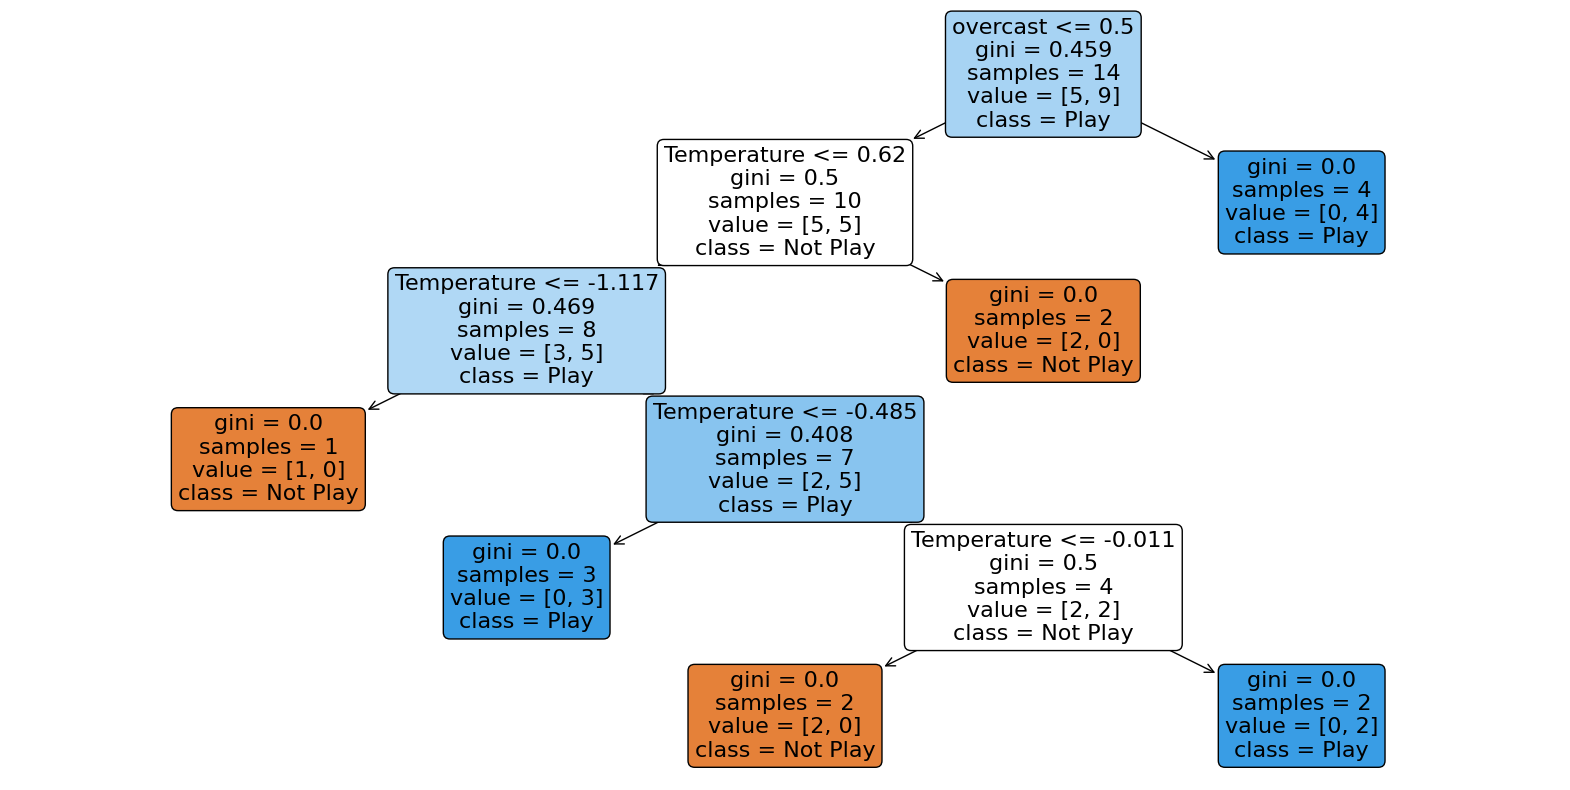

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# The whole Training Phase above is done inside sklearn like this
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], rounded=True, fontsize=16)
plt.show()

<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/WNNfuMa.png" width=700 />

<img src="https://i.imgur.com/cZhNO8y.png" width=700 />


In [ ]:
# Make predictions
y_pred = dt_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 0 1 0 1 0 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>


In [ ]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7142857142857143


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Depth of the tree**
</div>
<img src="https://i.imgur.com/AJHuTSf.png" width=700 />


In [ ]:
labels, predictions, accuracies = list(y_test), [], []

k_list = [2, 3, 4, 5]
for k in k_list:
    dt_clf = DecisionTreeClassifier(max_depth=k)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'Depth_{k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'Depth_{k}' for k in k_list]).T

print(df_predictions)
print(df_accuracies)

    Label  Depth_2  Depth_3  Depth_4  Depth_5
0       0        0        0        0        0
1       1        1        1        1        1
2       1        1        1        0        1
3       0        0        0        0        0
4       0        0        0        0        0
5       0        1        1        1        1
6       1        1        1        1        1
7       1        1        1        0        0
8       1        0        0        0        0
9       1        1        1        1        1
10      1        0        0        0        0
11      1        1        1        1        1
12      0        1        0        0        0
13      1        1        1        1        1
           Depth_2  Depth_3  Depth_4  Depth_5
Accuracy     71.43    78.57    64.29    71.43


<div class='markdown-google-sans'>

#### **Minimum samples split**
</div>
<img src="https://i.imgur.com/oGiQ5to.png" width=700 />


In [ ]:
# Initialize lists
labels, predictions, accuracies = list(y_test), [], []

# Loop through different min samples split
k_list = [9, 8, 5, 2]
for k in k_list:
    dt_clf = DecisionTreeClassifier(min_samples_split=k)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

# Create DataFrames
df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(k_list, predictions):
    df_predictions[f'MinSplit_{k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'MinSplit_{k}' for k in k_list]).T

print(df_predictions)
print(df_accuracies)

    Label  MinSplit_9  MinSplit_8  MinSplit_5  MinSplit_2
0       0           0           0           0           0
1       1           1           1           1           1
2       1           1           1           0           1
3       0           0           0           0           0
4       0           0           0           0           0
5       0           1           1           1           1
6       1           1           1           1           1
7       1           1           1           0           0
8       1           0           0           0           0
9       1           1           1           1           1
10      1           0           0           0           0
11      1           1           1           1           1
12      0           1           0           0           0
13      1           1           1           1           1
           MinSplit_9  MinSplit_8  MinSplit_5  MinSplit_2
Accuracy        71.43       78.57       64.29       71.43


<div class='markdown-google-sans'>

#### **Criterion**
</div>
<img src="https://i.imgur.com/AZQ8mtv.png" width=700 />


In [ ]:
# Initialize lists
labels, predictions, accuracies = list(y_test), [], []

# Loop through different criterion
criterions = ['gini','entropy']
for measure in criterions:
    dt_clf = DecisionTreeClassifier(criterion=measure)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

# Create DataFrames
df_predictions = pd.DataFrame({'Label': labels})
for k, pred in zip(criterions, predictions):
    df_predictions[f'Measure_{k}'] = pred

df_accuracies = pd.DataFrame({'Accuracy ': accuracies}, index=[f'Measure_{k}' for k in criterions]).T

print(df_predictions)
print(df_accuracies)

    Label  Measure_gini  Measure_entropy
0       0             0                0
1       1             1                1
2       1             1                1
3       0             0                0
4       0             0                0
5       0             1                1
6       1             1                1
7       1             0                0
8       1             0                0
9       1             1                1
10      1             0                0
11      1             1                1
12      0             0                0
13      1             1                1
           Measure_gini  Measure_entropy
Accuracy          71.43            71.43


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/XqSLwiM.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Decision Tree Classifier Simplified**
</div>

Accuracy: 0.6428571428571429


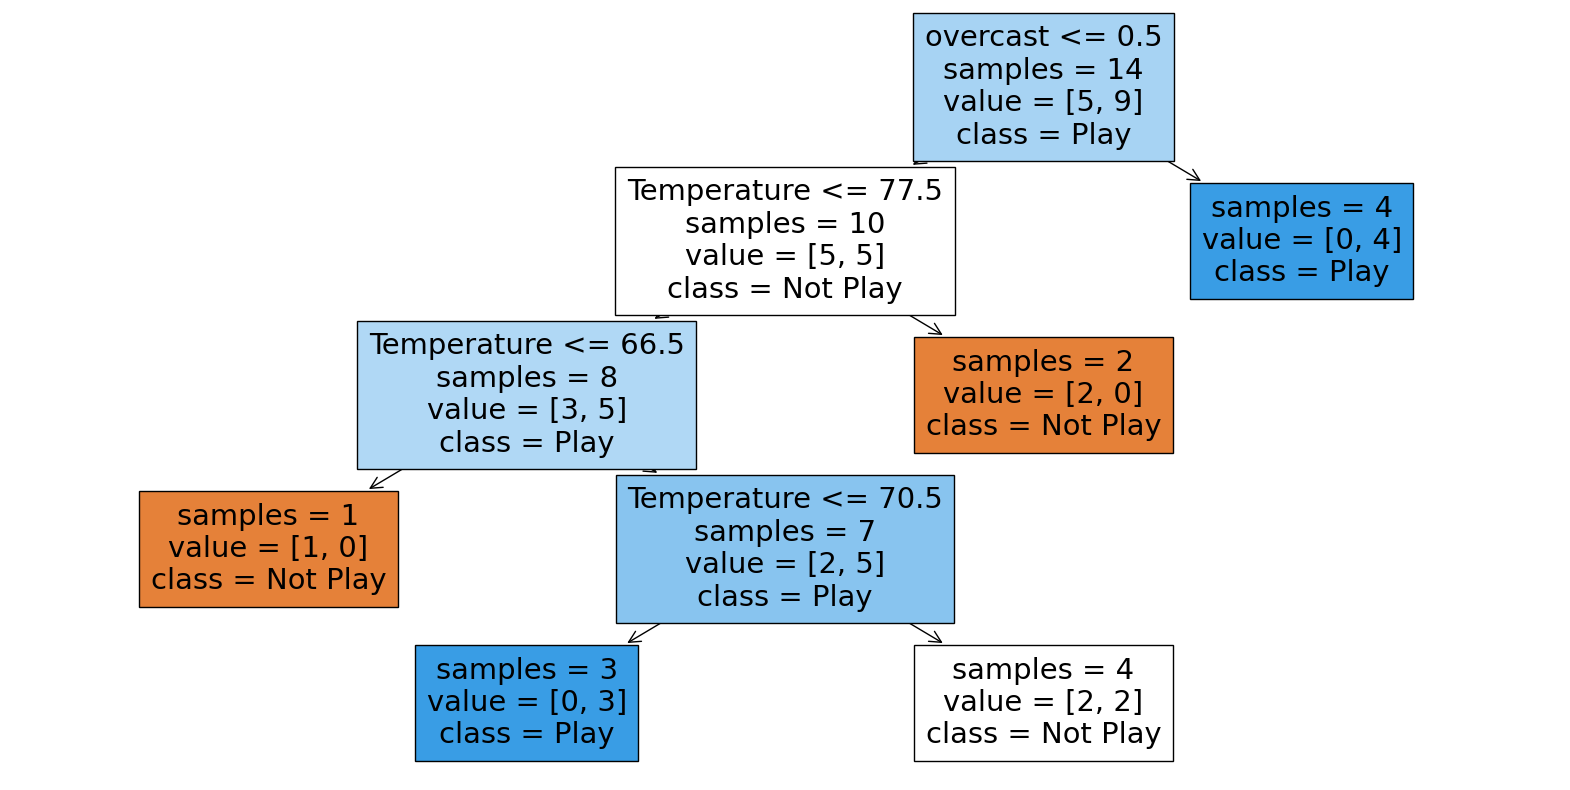

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for Decision Tree classification and plotting.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# READ DATA ── Load the dataset.
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# FIT MODEL ── Initialize and train the Decision Tree Classifier.
dt_clf = DecisionTreeClassifier(min_samples_split=5)
dt_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data using the trained model.
y_pred = dt_clf.predict(X_test)

# EVALUATE ── Calculate and display the model's accuracy.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# PLOT TREE ── Display the decision tree diagram.
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-4**
</div>
Using the following dataset, perform classification using Decision Tree on the column Play. Print out the accuracy score and show the tree.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)
print(df.head())

   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Play  
0              0     1  
1              0     0  
2              0     0 

Accuracy: 0.6428571428571429


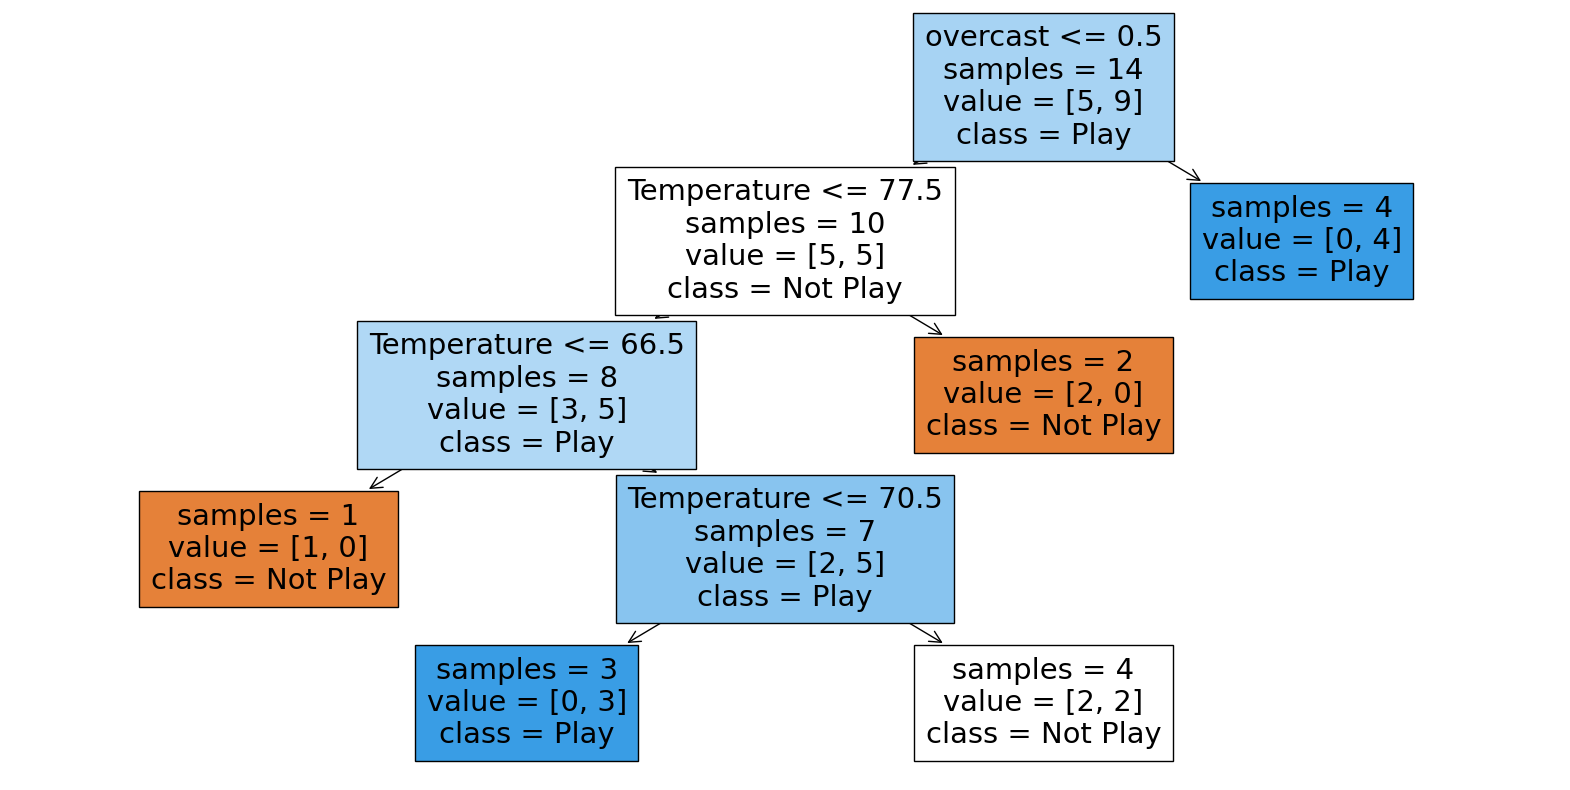

In [ ]:
# Answer
# FIT MODEL ── Initialize and train the Decision Tree Classifier.
dt_clf = DecisionTreeClassifier(min_samples_split=5)
dt_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data using the trained model.
y_pred = dt_clf.predict(X_test)

# EVALUATE ── Calculate and display the model's accuracy.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# PLOT TREE ── Display the decision tree diagram.
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()

---
---

<div class='markdown-google-sans'>

## **04.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Logistic Regression**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Linear Model & Logistic Regression**
</div>
<img src="https://i.imgur.com/kLwYHzM.png" width=700 />

<img src="https://i.imgur.com/qvbjF6K.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/3f3T0oq.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# READ DATA ── Load the dataset from a specified dictionary.
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# REARRANGE COLUMNS (except 'Play' which will be our target)
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Split the data into features (X) and target (y)
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# SCALE Temperature and Humidity AFTER splitting
scaler = StandardScaler()
X_train[['Temperature', 'Humidity']] = scaler.fit_transform(X_train[['Temperature', 'Humidity']])
X_test[['Temperature', 'Humidity']] = scaler.transform(X_test[['Temperature', 'Humidity']])

# Print the results
print("Training set:")
print(pd.concat([X_train, y_train], axis=1), '\n')
print("Test set:")
print(pd.concat([X_test, y_test], axis=1))

Training set:
    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0     1.804715  0.497155     0     0
1       1         0      0     1.015152  1.024440     1     0
2       0         1      0     1.488890 -0.241045     0     1
3       0         0      1    -0.563974  1.657183     0     1
4       0         0      1    -0.879799 -0.030131     0     1
5       0         0      1    -1.353537 -1.084702     1     0
6       0         1      0    -1.511449 -1.611987     1     1
7       1         0      0    -0.248148  1.551726     0     0
8       1         0      0    -0.721886 -1.084702     0     1
9       0         0      1     0.225589 -0.030131     0     1
10      1         0      0     0.225589 -1.084702     1     1
11      0         1      0    -0.248148  1.024440     1     1
12      0         1      0     1.173065 -0.557416     0     1
13      0         0      1    -0.406061 -0.030131     1     0 

Test set:
    sunny  overcast  rainy  Temperature  Hum

In [ ]:
X_train.to_csv('X_train.csv', index=False)

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/qMf1LIK.png" width=700 />


<div class='markdown-google-sans'>

#### **Training Phase**
</div>

<img src="https://i.imgur.com/1lBtk3d.png" width=700 />


<img src="https://i.imgur.com/5E0Qhfb.png" width=700 />

<img src="https://i.imgur.com/8rJUqGh.png" width=700 />


<img src="https://i.imgur.com/KVLdOlN.png" width=700 />


<img src="https://i.imgur.com/3Ham8U1.png" width=700 />

<img src="https://i.imgur.com/ZDhDbLP.png" width=700 />



In [ ]:
# ... (previous data preprocessing code remains the same)

import numpy as np
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculate_probabilities(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def calculate_log_loss(probabilities, y):
    return -y * np.log(probabilities) - (1 - y) * np.log(1 - probabilities)

def create_output_dataframe(X, y, weights):
    probabilities = calculate_probabilities(X, weights)
    log_losses = calculate_log_loss(probabilities, y)

    df = pd.DataFrame({
        'Probability': probabilities,
        'Label': y,
        'Log Loss': log_losses
    })

    return df

def calculate_average_log_loss(X, y, weights):
    probabilities = calculate_probabilities(X, weights)
    log_losses = calculate_log_loss(probabilities, y)
    return np.mean(log_losses)

# Convert X_train and y_train to numpy arrays for easier computation
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Add a column of 1s to X_train_np for the bias term
X_train_np = np.column_stack((np.ones(X_train_np.shape[0]), X_train_np))

# Initialize weights (including bias) to 0.1
initial_weights = np.full(X_train_np.shape[1], 0.1)

# Create and display DataFrame for initial weights
print(f"Initial Weights: {initial_weights}")
initial_df = create_output_dataframe(X_train_np, y_train_np, initial_weights)
print(initial_df.to_string(index=False, float_format=lambda x: f"{x:.6f}"))
print(f"\nAverage Log Loss: {calculate_average_log_loss(X_train_np, y_train_np, initial_weights):.6f}")

Initial Weights: [0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 Probability  Label  Log Loss
    0.605918      0  0.931197
    0.623389      0  0.976543
    0.580490      1  0.543883
    0.576720      1  0.550399
    0.527225      1  0.640128
    0.514040      0  0.721630
    0.496914      1  0.699338
    0.581846      0  0.871906
    0.504835      1  0.683523
    0.554667      1  0.589387
    0.553319      1  0.591821
    0.593301      1  0.522053
    0.565021      1  0.570892
    0.563746      0  0.829532

Average Log Loss: 0.694445


In [ ]:
def gradient_descent_step(X, y, weights, learning_rate):
    m = len(y)
    probabilities = calculate_probabilities(X, weights)
    gradient = np.dot(X.T, (probabilities - y)) / m
    new_weights = weights - learning_rate * gradient  # Create new array for updated weights
    return new_weights

# Perform one step of gradient descent
learning_rate = 0.1
updated_weights = gradient_descent_step(X_train_np, y_train_np, initial_weights, learning_rate)

# Print initial and updated weights
print("\nInitial weights:")
for feature, weight in zip(['Bias'] + list(X_train.columns), initial_weights):
    print(f"{feature:11}: {weight:.2f}")

print("\nUpdated weights after one iteration:")
for feature, weight in zip(['Bias'] + list(X_train.columns), updated_weights):
    print(f"{feature:11}: {weight:.2f}")


Initial weights:
Bias       : 0.10
sunny      : 0.10
overcast   : 0.10
rainy      : 0.10
Temperature: 0.10
Humidity   : 0.10
Wind       : 0.10

Updated weights after one iteration:
Bias       : 0.11
sunny      : 0.09
overcast   : 0.11
rainy      : 0.10
Temperature: 0.09
Humidity   : 0.08
Wind       : 0.10


In [ ]:
def gradient_descent_step(X, y, weights, learning_rate):
    m = len(y)
    probabilities = calculate_probabilities(X, weights)
    gradient = np.dot(X.T, (probabilities - y)) / m
    new_weights = weights - learning_rate * gradient  # Create new array for updated weights
    return new_weights

# Initialize weights (including bias) to 0.1
initial_weights = np.full(X_train_np.shape[1], 0.1)

# Calculate and print initial loss
initial_loss = calculate_average_log_loss(X_train_np, y_train_np, initial_weights)

print("\nInitial weights and loss:")
for feature, weight in zip(['Bias'] + list(X_train.columns), initial_weights):
    print(f"{feature:11}: {weight:.6f}")
print(f"Initial loss: {initial_loss:.6f}")

# Perform one step of gradient descent
learning_rate = 0.1
updated_weights = gradient_descent_step(X_train_np, y_train_np, initial_weights, learning_rate)

# Calculate and print updated loss
updated_loss = calculate_average_log_loss(X_train_np, y_train_np, updated_weights)

print("\nUpdated weights and loss after one iteration:")
for feature, weight in zip(['Bias'] + list(X_train.columns), updated_weights):
    print(f"{feature:11}: {weight:.6f}")
print(f"Updated loss: {updated_loss:.6f}")

# Print the difference in loss
print(f"\nChange in loss: {updated_loss - initial_loss:.6f}")


Initial weights and loss:
Bias       : 0.100000
sunny      : 0.100000
overcast   : 0.100000
rainy      : 0.100000
Temperature: 0.100000
Humidity   : 0.100000
Wind       : 0.100000
Initial loss: 0.694445

Updated weights and loss after one iteration:
Bias       : 0.108275
sunny      : 0.093791
overcast   : 0.112602
rainy      : 0.101883
Temperature: 0.091467
Humidity   : 0.083186
Wind       : 0.097538
Updated loss: 0.688212

Change in loss: -0.006233


In [ ]:
# With sklearn, you can get the final weights (coefficients)
# and final bias (intercepts) easily.
# The result is almost the same as doing it manually above.

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(penalty=None, solver='saga')
lr_clf.fit(X_train, y_train)

coefficients = lr_clf.coef_
intercept = lr_clf.intercept_

y_train_prob = lr_clf.predict_proba(X_train)[:, 1]
loss = -np.mean(y_train * np.log(y_train_prob) + (1 - y_train) * np.log(1 - y_train_prob))

print(f"Weights & Bias Final: {coefficients[0].round(2)}, {round(intercept[0],2)}")
print("Loss Final:", loss.round(3))

Weights & Bias Final: [-1.38  4.95 -0.89 -0.55 -1.32 -3.53], 2.67
Loss Final: 0.32


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
0.8*1.32

1.056

<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/TiarAAF.png" width=700 />


In [ ]:
predicted_probs = lr_clf.predict_proba(X_test)[:, 1]

z_values = np.log(predicted_probs / (1 - predicted_probs))

result_df = pd.DataFrame({
    'ID': X_test.index,
    'Z-Values': z_values.round(3),
    'Probabilities': predicted_probs.round(3)
}).set_index('ID')

print(result_df)

    Z-Values  Probabilities
ID                         
14    -3.959          0.019
15     5.948          0.997
16     0.909          0.713
17    -1.893          0.131
18    -1.073          0.255
19    -2.536          0.073
20     2.441          0.920
21     0.752          0.680
22    -1.367          0.203
23     8.747          1.000
24     3.635          0.974
25     1.483          0.815
26     3.859          0.979
27     7.029          0.999


<img src="https://i.imgur.com/jcoVrWa.png" width=700 />


In [ ]:
# Make predictions
y_pred = lr_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 1 0 1 1 1 1 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/pmJdw08.png" width=700 />


In [ ]:
result_df = pd.DataFrame({
    'ID': X_test.index,
    'Label': y_test,
    'Probabilities': predicted_probs.round(2),
    'Prediction': y_pred,
}).set_index('ID')

print(result_df)

    Label  Probabilities  Prediction
ID                                  
14      0           0.01           0
15      1           1.00           1
16      1           0.74           1
17      0           0.10           0
18      0           0.23           0
19      0           0.04           0
20      1           1.00           1
21      1           0.70           1
22      1           0.18           0
23      1           1.00           1
24      1           0.99           1
25      1           1.00           1
26      0           0.99           1
27      1           1.00           1


In [ ]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **Regularization Type**
</div>
<img src="https://i.imgur.com/kHd5xmN.png" width=700 />

<img src="https://i.imgur.com/zbQJc3m.png" width=700 />

<img src="https://i.imgur.com/ylUF71p.png" width=700 />


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regs = [None, 'l1', 'l2']
coeff_dict = {}

for reg in regs:
    lr_clf = LogisticRegression(penalty=reg, solver='saga')
    lr_clf.fit(X_train, y_train)
    coefficients = lr_clf.coef_
    intercept = lr_clf.intercept_
    predicted_probs = lr_clf.predict_proba(X_train)[:, 1]
    loss = -np.mean(y_train * np.log(predicted_probs) + (1 - y_train) * np.log(1 - predicted_probs))
    predictions = lr_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    coeff_dict[reg] = {
        'Coefficients': coefficients,
        'Intercept': intercept,
        'Loss': loss,
        'Accuracy': accuracy
    }

for reg, vals in coeff_dict.items():
    print(f"{reg}: Coeff: {vals['Coefficients'][0].round(2)}, Intercept: {vals['Intercept'].round(2)}, Loss: {vals['Loss'].round(3)}, Accuracy: {vals['Accuracy'].round(3)}")


None: Coeff: [-1.38  4.94 -0.89 -0.55 -1.32 -3.53], Intercept: [2.67], Loss: 0.32, Accuracy: 0.857
l1: Coeff: [ 0.    0.58  0.    0.   -0.25  0.  ], Intercept: [0.45], Loss: 0.575, Accuracy: 0.643
l2: Coeff: [-0.54  0.76 -0.21 -0.2  -0.44 -0.67], Intercept: [1.01], Loss: 0.477, Accuracy: 0.929


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<div class='markdown-google-sans'>

#### **Regularization Strength**
</div>
<img src="https://i.imgur.com/L64yX8f.png" width=700 />

<img src="https://i.imgur.com/UKOa8Tz.png" width=700 />


In [ ]:
# List of regularization strengths to try
strengths = [0.001, 0.01, 0.1, 1, 10, 100]

coeff_dict = {}

for strength in strengths:
    lr_clf = LogisticRegression(penalty='l1', C=strength, solver='saga')
    lr_clf.fit(X_train, y_train)

    coefficients = lr_clf.coef_
    intercept = lr_clf.intercept_

    predicted_probs = lr_clf.predict_proba(X_train)[:, 1]
    loss = -np.mean(y_train * np.log(predicted_probs) + (1 - y_train) * np.log(1 - predicted_probs))
    predictions = lr_clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    coeff_dict[f'L1_{strength}'] = {
        'Coefficients': coefficients[0].round(2),
        'Intercept': round(intercept[0],2),
        'Loss': round(loss,3),
        'Accuracy': round(accuracy*100,2)
    }

print(pd.DataFrame(coeff_dict).T)

                                       Coefficients Intercept   Loss Accuracy
L1_0.001             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]      0.55  0.652    64.29
L1_0.01              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]     -0.07  0.703    35.71
L1_0.1               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]      0.67  0.652    64.29
L1_1              [0.0, 0.58, 0.0, 0.0, -0.25, 0.0]      0.45  0.575    64.29
L1_10        [-0.54, 4.08, 0.0, -0.39, -1.0, -2.67]      1.48  0.337    85.71
L1_100    [-1.29, 4.85, -0.78, -0.53, -1.28, -3.44]      2.53  0.321    85.71


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<img src="https://i.imgur.com/xHu4BWJ.png" width=700 />


In [ ]:
# List of regularization strengths to try
strengths = [0.001, 0.01, 0.1, 1, 10, 100]

coeff_dict = {}

for strength in strengths:
    lr_clf = LogisticRegression(penalty='l2', C=strength, solver='saga')
    lr_clf.fit(X_train, y_train)

    coefficients = lr_clf.coef_
    intercept = lr_clf.intercept_

    predicted_probs = lr_clf.predict_proba(X_train)[:, 1]
    loss = -np.mean(y_train * np.log(predicted_probs) + (1 - y_train) * np.log(1 - predicted_probs))
    predictions = lr_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    coeff_dict[f'L2_{strength}'] = {
        'Coefficients': coefficients[0].round(2),
        'Intercept': round(intercept[0],2),
        'Loss': round(loss,3),
        'Accuracy': round(accuracy*100,2)
    }

print(pd.DataFrame(coeff_dict).T)

                                       Coefficients Intercept   Loss Accuracy
L2_0.001        [-0.0, 0.0, -0.0, -0.0, -0.0, -0.0]      0.46  0.653    64.29
L2_0.01    [-0.01, 0.01, -0.0, -0.01, -0.02, -0.01]      0.59  0.646    64.29
L2_0.1    [-0.11, 0.13, -0.02, -0.06, -0.14, -0.09]      0.64  0.605    64.29
L2_1       [-0.54, 0.76, -0.21, -0.2, -0.44, -0.67]      1.01  0.477    92.86
L2_10     [-1.23, 2.35, -0.79, -0.41, -0.83, -2.12]      2.01  0.357    85.71
L2_100    [-1.38, 4.39, -0.89, -0.52, -1.22, -3.27]      2.56  0.324    85.71


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/gFFEFY1.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Logistic Regression Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for Logistic Regression and data preprocessing.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# STANDARDIZE NUMERICAL COLUMNS ── Normalize numerical columns using standard scaling.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and train the Logistic Regression model with L2 regularization.
lr_clf = LogisticRegression(penalty='l2', C=1, solver='saga')
lr_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data using the trained model.
y_pred = lr_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9285714285714286


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 04-5**
</div>
Using the following dataset, perform classification using Logistic Regression on the column Play. Use `'l1'` regularization and choose any strength (C). Print out the accuracy score.

In [ ]:
import pandas as pd
import numpy as np

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)

print(df.head())

   DaytimeDuration  SunshineDuration  Temperature  Humidity  RainfallAmount  \
0            12.56             11.10        34.58     27.68           76.25   
1            10.10              8.72        20.60     63.92           53.94   
2            11.10              8.27        17.28     75.45           77.86   
3            10.89             10.73        22.38     49.55           53.04   
4            12.95              8.01        28.71     24.45            0.06   

   LightningStrikes  Outlook_Overcast  Outlook_Rainy  Outlook_Snowy  \
0                10                 0              0              1   
1                10                 1              0              0   
2                 5                 1              0              0   
3                 7                 0              0              1   
4                 8                 1              0              0   

   Outlook_Sunny  Play  
0              0     1  
1              0     0  
2              0     0 

In [ ]:
# Answer
# FIT MODEL ── Initialize and train the Logistic Regression model with L2 regularization.
lr_clf = LogisticRegression(penalty='l2', C=1, solver='saga')
lr_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data using the trained model.
y_pred = lr_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9285714285714286


<div class='markdown-google-sans'>

## **04.6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Support Vector Machine**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Support Vector Machine**
</div>
<img src="https://i.imgur.com/sLr9EqY.png" width=700 />

<img src="https://i.imgur.com/2H7JxdS.png" width=700 />

<img src="https://i.imgur.com/0EO1BbZ.png" width=700 />

<img src="https://i.imgur.com/uBU9YP3.png" width=700 />

<img src="https://i.imgur.com/vPHHx6R.png" width=700 />

<img src="https://i.imgur.com/REyKIBY.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/bEuS2zZ.png" width=700 />

<img src="https://i.imgur.com/LerL8QS.png" width=700 />

<img src="https://i.imgur.com/RhpVC0H.png" width=700 />

<img src="https://i.imgur.com/tSpxKKE.png" width=700 />

<img src="https://i.imgur.com/cnmo0Z0.png" width=700 />

<img src="https://i.imgur.com/GaHftSO.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=700 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/qMf1LIK.png" width=700 />


In [ ]:
# STANDARDIZE NUMERICAL COLUMNS ── Apply standard scaling to numerical columns to normalize data.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

print(X_train[float_cols].round(2), '\n')
print(X_test[float_cols].round(2))

    Temperature  Humidity
0          1.80      0.50
1          1.02      1.02
2          1.49     -0.24
3         -0.56      1.66
4         -0.88     -0.03
5         -1.35     -1.08
6         -1.51     -1.61
7         -0.25      1.55
8         -0.72     -1.08
9          0.23     -0.03
10         0.23     -1.08
11        -0.25      1.02
12         1.17     -0.56
13        -0.41     -0.03 

    Temperature  Humidity
14         1.17      0.81
15         0.07      1.24
16         0.38      0.50
17         0.70     -0.56
18         1.33      1.24
19        -1.04      1.02
20         1.80      0.50
21        -0.09      0.81
22         2.28     -1.61
23         0.54     -1.08
24         0.86     -2.14
25         1.02      1.55
26        -1.20     -1.08
27         1.65     -0.24



<img src="https://i.imgur.com/IWV8DDc.png" width=800 />



In [ ]:
# Set regularization parameter
reg_param = 1

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/SoFW9Vs.png" width=700 />

<img src="https://i.imgur.com/SlbhoWv.png" width=700 />


In [ ]:
from sklearn.svm import SVC

# Fit the SVC model
svc_clf = SVC(kernel='linear', C=reg_param)
svc_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

<img src="https://i.imgur.com/cWc1WOl.png" width=700 />



In [ ]:
# Access the support vector index
support_vectors_indices = svc_clf.support_

# Access the Lagrange multipliers
lagrange_mult = svc_clf.dual_coef_

print(f"Final Lagrange Multiplier\n {pd.Series(lagrange_mult[0], index=support_vectors_indices).round(2)}")

Final Lagrange Multiplier
 0    -1.00
1    -0.15
5    -1.00
7    -1.00
13   -1.00
2     0.01
3     1.00
8     0.46
9     1.00
10    1.00
11    0.67
dtype: float64


<img src="https://i.imgur.com/r7XyGrQ.png" width=700 />


In [ ]:
# Access the weight coefficients
weights = svc_clf.coef_

# Access the bias
bias = svc_clf.intercept_

print(f"Weights: {weights.round(2)}")
print(f"Bias: {bias.round(2)}")

Weights: [[-0.68  0.68  0.   -0.52 -0.33 -0.47]]
Bias: [0.81]


<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/AJTA9SF.png" width=700 />

<img src="https://i.imgur.com/OUFgT4G.png" width=700 />


In [ ]:
# Predict the test data
y_pred = svc_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 1 0 1 1 1 1 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/XX7rFuO.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>

<div class='markdown-google-sans'>

#### **C**
</div>
<img src="https://i.imgur.com/9ByWVEM.png" width=700 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

c_values = [0.1, 1, 10, 100]  # Different values for C parameter
for c in c_values:
    svc_clf = SVC(kernel='linear', C=c)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for c, pred in zip(c_values, predictions):
    df_predictions[f'C = {c}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'C = {c}' for c in c_values]).T

print(df_predictions)
print(df_accuracies)


    Label  C = 0.1  C = 1  C = 10  C = 100
0       0        1      0       0        0
1       1        1      1       1        1
2       1        1      1       1        1
3       0        1      0       0        0
4       0        1      0       0        0
5       0        1      1       0        0
6       1        1      1       1        1
7       1        1      1       1        1
8       1        1      0       0        0
9       1        1      1       1        1
10      1        1      1       1        1
11      1        1      1       1        1
12      0        1      1       1        1
13      1        1      1       1        1
          C = 0.1  C = 1  C = 10  C = 100
Accuracy    64.29  78.57   85.71    85.71


<div class='markdown-google-sans'>

#### **Kernel Type**
</div>
<img src="https://i.imgur.com/OMBUKJ7.png" width=700 />

<img src="https://i.imgur.com/8Ux0tV1.png" width=700 />

<img src="https://i.imgur.com/oChgKRz.png" width=700 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

kernel_list = ['linear',  'rbf', 'poly', 'sigmoid']
for kernel in kernel_list:
    svc_clf = SVC(kernel=kernel)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for kernel, pred in zip(kernel_list, predictions):
    df_predictions[f'Kernel = {kernel}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'Kernel = {kernel}' for kernel in kernel_list]).T

print(df_predictions)
print(df_accuracies)


    Label  Kernel = linear  Kernel = rbf  Kernel = poly  Kernel = sigmoid
0       0                0             0              0                 0
1       1                1             1              1                 1
2       1                1             1              1                 1
3       0                0             1              1                 1
4       0                0             0              0                 0
5       0                1             1              1                 1
6       1                1             1              1                 1
7       1                1             1              1                 1
8       1                0             1              1                 1
9       1                1             1              1                 1
10      1                1             1              1                 1
11      1                1             1              1                 1
12      0                1            

<div class='markdown-google-sans'>

#### **Gamma**
</div>
<img src="https://i.imgur.com/KfsShPl.png" width=700 />


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

labels, predictions, accuracies = list(y_test), [], []

gamma_list = [0.1, 1, 10, 100]
for gamma in gamma_list:
    svc_clf = SVC(kernel='rbf', gamma=gamma)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    predictions.append(list(y_pred))
    accuracies.append(accuracy_score(y_test, y_pred).round(4)*100)

df_predictions = pd.DataFrame({'Label': labels})
for gamma, pred in zip(gamma_list, predictions):
    df_predictions[f'Gamma = {gamma}'] = pred

df_accuracies = pd.DataFrame({'Accuracy': accuracies}, index=[f'Gamma = {gamma}' for gamma in gamma_list]).T

print(df_predictions)
print(df_accuracies)


    Label  Gamma = 0.1  Gamma = 1  Gamma = 10  Gamma = 100
0       0            1          0           0            1
1       1            1          1           1            1
2       1            1          1           1            1
3       0            1          1           1            1
4       0            1          0           1            1
5       0            1          1           1            1
6       1            1          1           1            1
7       1            1          1           1            1
8       1            1          1           1            1
9       1            1          1           1            1
10      1            1          1           1            1
11      1            1          1           1            1
12      0            1          1           1            1
13      1            1          1           1            1
          Gamma = 0.1  Gamma = 1  Gamma = 10  Gamma = 100
Accuracy        64.29      78.57       71.43        64.29

<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/owS1HKD.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Support Vector Classifier Simplified**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for SVM classification and data preprocessing.
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT DATA ── Divide the dataset into 50% training and 50% testing sets without shuffling.
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# STANDARDIZE NUMERICAL COLUMNS ── Apply standard scaling to numerical columns to normalize data.
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT MODEL ── Initialize and configure the SVM with a linear kernel and a C value of 1.
svc_clf = SVC(kernel='linear', C=1)
svc_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data using the trained SVM.
y_pred = svc_clf.predict(X_test)

# EVALUATE ── Calculate and display the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7857142857142857


<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

<div class='markdown-google-sans'>

### 📊　Dataset & Libraries Used
</div>

The following is the dataset that you will use for this exercise (same as the previous exercise). This is a one-year weather dataset in Golf Land.
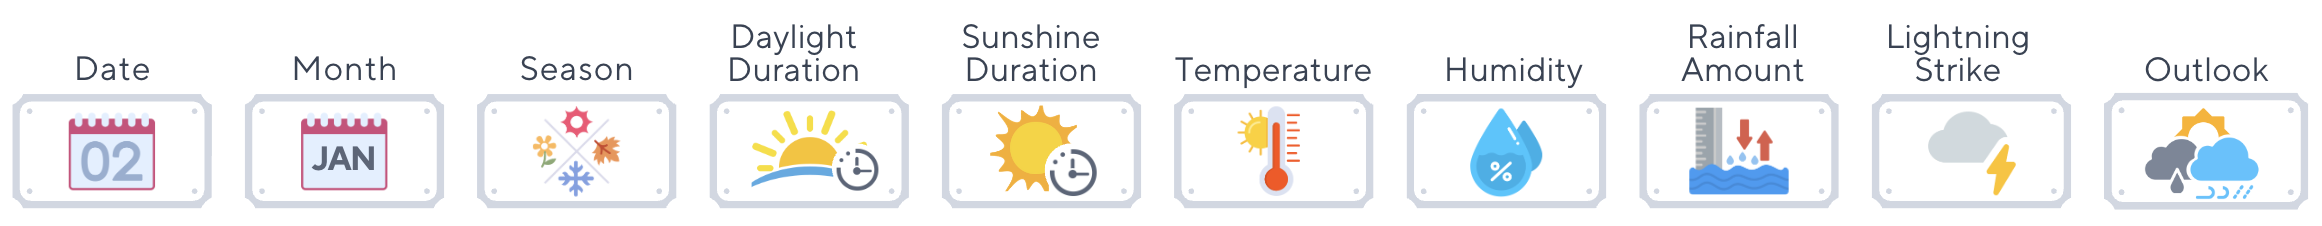
1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

🎯 **Goal**:

While it is easy to see when it is rainy (high rainfall amount) or sunny (high sunshine duration), it is challenging to predict whether it will be overcast or not.

The main goal of the exercise is to predict **whether the outlook is overcast or not overcast** based on the weather conditions.

In [ ]:
# IMPORT LIBRARIES ── Import libraries necessary for data manipulation and model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# READ DATA ── Load the dataset from the specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/bce2re8zx8539jeimprg7/golf_dataset_weather_seasonal_1year.csv?rlkey=7vkl6bq9c55jujeh9do29ty91&dl=0&raw=1"
golf_dataset = pd.read_csv(dataset_url)

# TRANSFORM DATA ── Create 'overcast' binary column and drop unused 'Date' and 'Outlook' columns.
golf_dataset['overcast'] = (golf_dataset['Outlook'] == 'overcast').astype(int)
golf_dataset = golf_dataset.drop(columns=['Date', 'Outlook'])

# DISPLAY DATA ── Print the modified DataFrame to review changes.
print(golf_dataset)

    Month  Season  DaytimeDuration  SunshineDuration  Temperature  Humidity  \
0     Jan  Winter            9.571             8.862        5.910    44.790   
1     Jan  Winter            9.582             5.834        3.187    52.813   
2     Jan  Winter            9.595             1.660       -1.167    45.567   
3     Jan  Winter            9.608             8.236        5.359    54.341   
4     Jan  Winter            9.622             2.182        2.597    52.103   
..    ...     ...              ...               ...          ...       ...   
360   Dec  Winter            9.528             4.016        9.565    45.635   
361   Dec  Winter            9.534             5.803       11.979    47.221   
362   Dec  Winter            9.541             0.741        7.978    53.422   
363   Dec  Winter            9.550             1.273        9.274    57.226   
364   Dec  Winter            9.559             4.677       11.737    38.663   

     RainfallAmount  LightningStrikes  overcast  
0

<div class='markdown-google-sans'>

## **4.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dummy Classifier**
</div>

In [ ]:
# IMPORT LIBRARIES ── Load necessary libraries for Dummy Classifier.
from sklearn.dummy import DummyClassifier

# GET DATA & ONE-HOT ENCODE ── Copy and one-hot encode categorical attributes in the dataset.
df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)

# SPLIT DATA ── Split the dataset into 60% training and 40% testing sets using a stratified method to maintain class distribution.
X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y # This ensures the class distribution remains the same in both train and test sets
)

# FIT MODEL ── Initialize and train the Dummy Classifier with the 'most frequent' strategy.
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test data.
y_pred = dummy_clf.predict(X_test)

# EVALUATE ── Calculate and print the accuracy of the model.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.6712328767123288


<div class='markdown-google-sans'>

## **4.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**kNN Classifier**
</div>

In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for kNN classification and data handling.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.
df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)

# SPLIT TRAIN & TEST DATA ── Use the same method as the Dummy Classifier to divide the data into training and testing sets.
X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y
)

# SCALE DATA ── Apply appropriate scaling to numerical variables based on their distributions as discussed in Lesson 2 and observed in Lesson 3 Exercise.
# Standardize features
scaler = StandardScaler()

# FIT MODEL ── Initialize and fit the kNN Classifier with the chosen parameters.
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)

# PREDICT TEST DATA ── Use the trained kNN model to make predictions on the test data.

y_pred = knn_clf.predict(X_test)

# EVALUATE MODEL ── Print the accuracy of the model to assess its performance.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8698630136986302


<div class='markdown-google-sans'>

## **4.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Naive Bayes**
</div>


In [ ]:
# IMPORT LIBRARIES ── Import necessary libraries for Bernoulli Naive Bayes classification.
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.
df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)

# Define binning for numerical attributes by selecting only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Apply binning to numerical columns - 3 bins: 'low', 'medium', 'high'
for col in numerical_columns:
    df[col + '_binned'] = pd.cut(df[col], bins=3, labels=['low', 'medium', 'high'])

# One-hot encode the binned columns and other categorical attributes
binned_columns = [col + '_binned' for col in numerical_columns]
df = pd.get_dummies(df, columns=binned_columns, drop_first=True)

# SPLIT TRAIN & TEST DATA ── Use the same method as the Dummy Classifier to divide the data into training and testing sets.
X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y
)

# BINARIZE DATA ── Perform binning on numerical attributes into three classes (high, medium, low) and then one-hot encode these binned categories.
df.head()

scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])


# FIT MODEL ── Initialize and train the default Bernoulli Naive Bayes Classifier.
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

# PREDICT TEST DATA ── Use the trained model to make predictions on the test data.
y_pred = nb_clf.predict(X_test)


# EVALUATE MODEL ── Print the accuracy of the model to assess its performance.

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


In [ ]:
df.head()


,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,overcast,Month_Apr,Month_Aug,Month_Dec,...,Temperature_binned_medium,Temperature_binned_high,Humidity_binned_medium,Humidity_binned_high,RainfallAmount_binned_medium,RainfallAmount_binned_high,LightningStrikes_binned_medium,LightningStrikes_binned_high,overcast_binned_medium,overcast_binned_high
0,9.571,8.862,5.910,44.790,0.56,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.582,5.834,3.187,52.813,0.51,0,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,9.595,1.660,-1.167,45.567,4.14,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,9.608,8.236,5.359,54.341,0.67,0,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,9.622,2.182,2.597,52.103,0.41,0,0,False,False,False,...,False,False,True,False,False,False,False,False,False,False


<div class='markdown-google-sans'>

## **4.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Decision Tree Classifier**
</div>

Accuracy: 0.9726027397260274


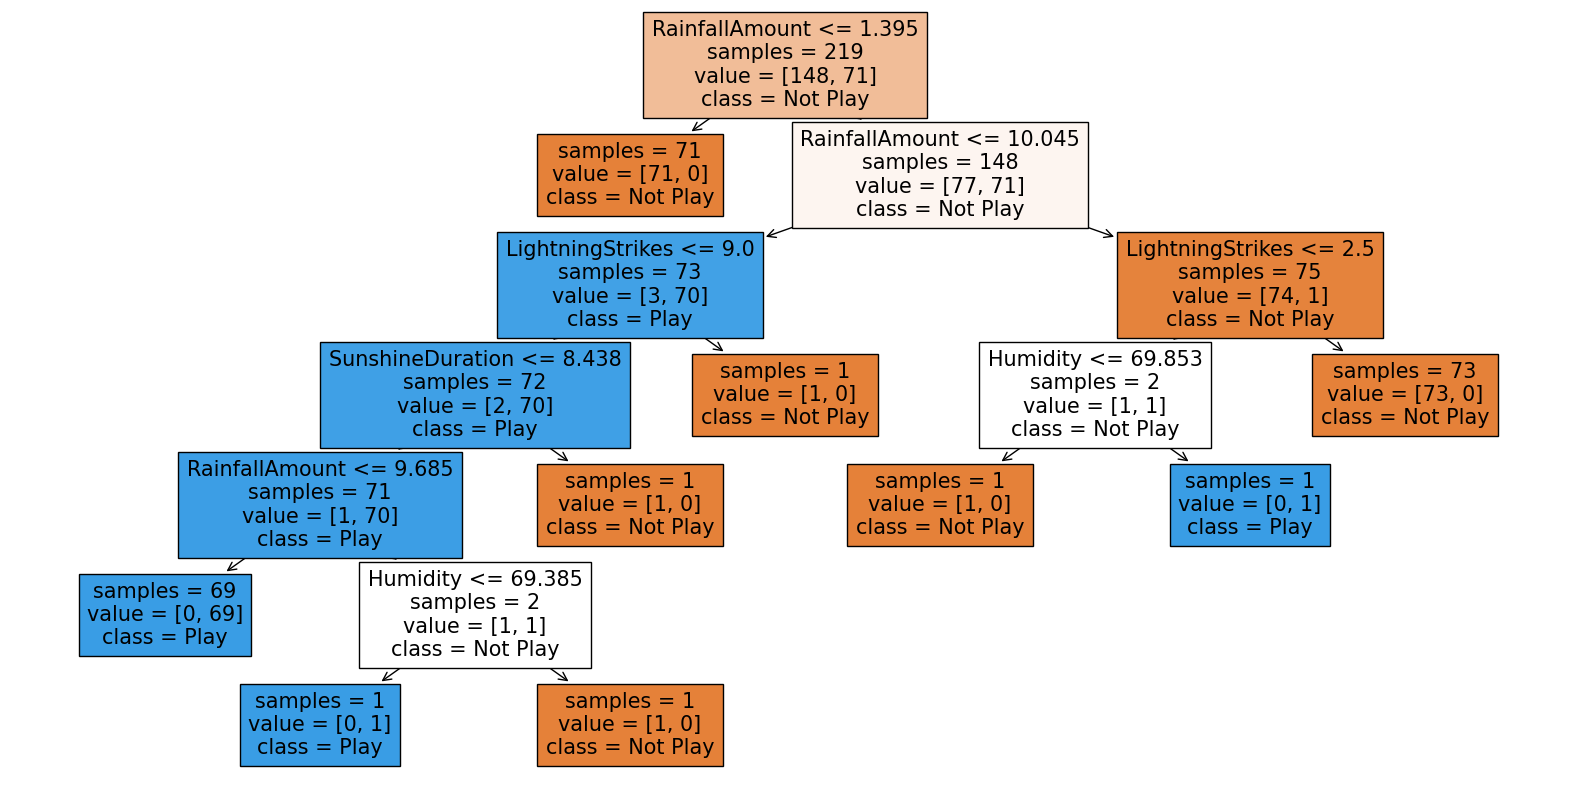

In [ ]:
# 1. Decision Tree with Default Parameters
# IMPORT LIBRARIES ── Import necessary libraries for Decision Tree classification.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT TRAIN & TEST DATA ── Use the same method as the Dummy Classifier to divide the data into training and testing sets.

X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y
)
# FIT MODEL ── Initialize and train the Decision Tree model using default parameters.
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# PREDICT TEST DATA ── Use the trained Decision Tree model to make predictions on the test data.
y_pred = dt_clf.predict(X_test)

# EVALUATE MODEL ── Print the accuracy of the model to assess its performance.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# PLOT TREE ── Display the decision tree diagram.


plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()


Accuracy: 0.9726027397260274


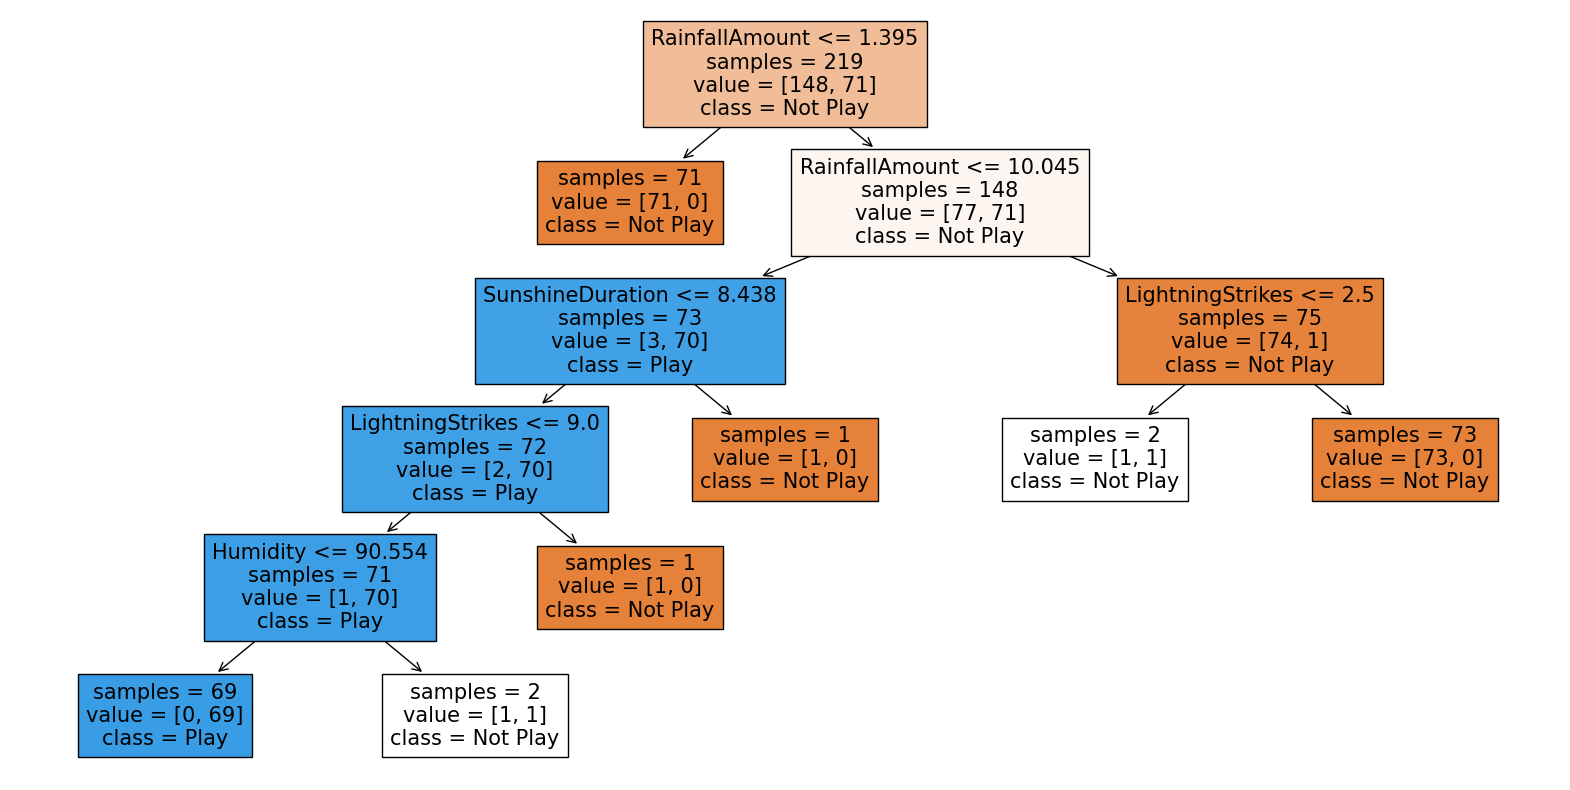

In [ ]:
# 2. Decision Tree with Custom Parameters
# IMPORT LIBRARIES ── Import necessary libraries for Decision Tree classification.


# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.


# SPLIT TRAIN & TEST DATA ── Use the same splitting method as before to ensure consistent test and training data.


# FIT MODEL ── Configure and train the Decision Tree with specified parameters like max depth or minimum samples.


# PREDICT TEST DATA ── Make predictions using the customized Decision Tree model.


# EVALUATE MODEL ── Print the accuracy and show the structure of the modified Decision Tree model.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT TRAIN & TEST DATA ── Use the same method as the Dummy Classifier to divide the data into training and testing sets.

X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y
)
# FIT MODEL ── Initialize and train the Decision Tree model using default parameters.
dt_clf = DecisionTreeClassifier(min_samples_split=5)
dt_clf.fit(X_train, y_train)

# PREDICT TEST DATA ── Use the trained Decision Tree model to make predictions on the test data.
y_pred = dt_clf.predict(X_test)

# EVALUATE MODEL ── Print the accuracy of the model to assess its performance.
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# PLOT TREE ── Display the decision tree diagram.


plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()





<div class='markdown-google-sans'>

## **4.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Logistic Regression**
</div>


In [ ]:
# IMPORT LIBRARIES ── Import libraries needed for logistic regression with L1 regularization.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes.

df = golf_dataset.copy(deep=True)
df = pd.get_dummies(df)
# SPLIT DATA ── Split data into training and testing sets using the same method as in the Dummy Classifier.

X, y = df.drop('overcast', axis=1), df['overcast']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.6,
    shuffle=True,
    random_state=42,
    stratify=y
)
# APPLY SCALING ── Use the same scaling method as applied for the kNN Classifier from section 4.2.

scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])
# FIT MODEL ── Set up and fit Logistic Regression with appropriately chosen L1 regularization strength.
lr_clf = LogisticRegression(penalty='l1', C=1, solver='saga')
lr_clf.fit(X_train, y_train)

# PREDICT ── Make predictions on the test dataset.

y_pred = lr_clf.predict(X_test)
# OUTPUT COEFFICIENTS ── Output model coefficients (weights) and intercept (bias).
x, y = lr_clf.coef_, lr_clf.intercept_
print(x, y)

# EVALUATE ── Compute and display the accuracy of the model.

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[-1.50013430e-01 -1.58459072e+00  8.16824735e-01 -1.42595310e-01
  -1.24135465e+00 -1.42565468e-01  4.19240388e-04  0.00000000e+00
   5.50692605e-01 -5.51930734e-01 -5.94867118e-01 -2.51002917e-01
  -1.23896379e-01  6.60994758e-01  5.64752850e-02  0.00000000e+00
  -9.58661810e-02 -1.80281688e-02  0.00000000e+00  0.00000000e+00
  -2.13911587e-02  0.00000000e+00]] [-0.5249816]
Accuracy: 0.7534246575342466


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
